In [1]:
import os
import random
from random import shuffle
import numpy as np
import torch
from torch.utils import data
from torchvision import transforms as T
from torchvision.transforms import functional as F
from PIL import Image

In [71]:
len(test_loader.dataset.image_paths)

520

In [1]:
from data_loader import get_loader
test_loader = get_loader(image_path='./ISIC/dataset/testcancer_all/',
                            image_size=224,
                            batch_size=5,
                            num_workers=9,
                            mode='test',
                            augmentation_prob=0.)

image count in test path :6248


In [9]:
test_loader.dataset.image_paths

['./ISIC/dataset/testcancer_all/1087_a_10023.png',
 './ISIC/dataset/testcancer_all/1022_v_20012.png',
 './ISIC/dataset/testcancer_all/1093_a_10030.png',
 './ISIC/dataset/testcancer_all/1035_a_10028.png',
 './ISIC/dataset/testcancer_all/1011_v_20002.png',
 './ISIC/dataset/testcancer_all/1017_v_20013.png',
 './ISIC/dataset/testcancer_all/1032_v_20013.png',
 './ISIC/dataset/testcancer_all/1051_v_20010.png',
 './ISIC/dataset/testcancer_all/1100_a_10015.png',
 './ISIC/dataset/testcancer_all/1010_a_10018.png',
 './ISIC/dataset/testcancer_all/1067_a_10022.png',
 './ISIC/dataset/testcancer_all/1091_v_20017.png',
 './ISIC/dataset/testcancer_all/1013_v_20007.png',
 './ISIC/dataset/testcancer_all/1075_v_20004.png',
 './ISIC/dataset/testcancer_all/1054_a_10030.png',
 './ISIC/dataset/testcancer_all/1046_v_20026.png',
 './ISIC/dataset/testcancer_all/1073_v_20001.png',
 './ISIC/dataset/testcancer_all/1031_a_10004.png',
 './ISIC/dataset/testcancer_all/1063_a_10042.png',
 './ISIC/dataset/testcancer_all

In [5]:
test_loader.dataset.image_paths[3]

'./ISIC/dataset/testcancer_all/1035_a_10028.png'

In [142]:
test_loader.dataset.image_paths[0].split('/')[-1][:-4]

'ISIC_0014624'

圖像尺寸 :  466 466
方向調整 :  -6
按照中心裁剪 :  252.0 252
平移變換(左上右下) 9 18 234 237


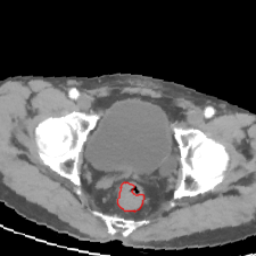

In [140]:
def show_augmentation(raw):
        
    image = raw 
    aspect_ratio = image.size[1]/image.size[0]
    hw = (image.size[0],image.size[1])
    print('圖像尺寸 : ', image.size[0],image.size[1])
    Transform = []
    ### 縮放到 300*X 或者 X*300 或者 X*320 或者 320*X
    ResizeRange = random.randint(300,320)
    Transform.append(T.Resize((int(ResizeRange*aspect_ratio),ResizeRange)))
    p_transform = random.random()
    
    ### 旋轉 0,90,180,270°
#     RotationDegrees = [0,90,180,270]
#     RotationDegree = random.randint(0,3)
#     RotationDegree = RotationDegrees[RotationDegree]
#     print('旋轉 : ', RotationDegree)
#     Transform.append(T.RandomRotation((RotationDegree,RotationDegree)))
    
   
    
    ### 方向調整 -10°~10°
    RotationRange = random.randint(-10,10)
    print('方向調整 : ', RotationRange)
    Transform.append(T.RandomRotation((RotationRange,RotationRange)))
    
    sTransform = T.Compose(Transform)
    tmp = sTransform(image) 
    
    ### 按照中心裁剪 
    CropRange = random.randint(250,270)
    Transform.append(T.CenterCrop((int(CropRange*aspect_ratio),CropRange)))
    print('按照中心裁剪 : ', CropRange*aspect_ratio,CropRange)
    
    
    Transform = T.Compose(Transform)

    image = Transform(image)
    
        
    ### 平移裁剪
    ShiftRange_left = random.randint(0,20)
    ShiftRange_upper = random.randint(0,20)
    ShiftRange_right = image.size[0] - random.randint(0,20)
    ShiftRange_lower = image.size[1] - random.randint(0,20)
    image = image.crop(box=(ShiftRange_left,ShiftRange_upper,ShiftRange_right,ShiftRange_lower))
    print('平移變換(左上右下)', ShiftRange_left, ShiftRange_upper, ShiftRange_right, ShiftRange_lower)
    
    ### 水平翻轉
    if random.random() < 0.5:
        print('水平翻轉')
        image = F.hflip(image)
    tmp = image
    ### 垂直翻轉
#     if random.random() < 0.5:
#         print('垂直翻轉')
#         image = F.vflip(image) 
    Transform = []
    
    Transform = T.ColorJitter(brightness=0.2,contrast=0.2,hue=0.02)
    
    image = Transform(image)
    
    ### 縮放到 256*X 或 X*256
    Transform = []
    Transform.append(T.Resize((int(256*aspect_ratio)-int(256*aspect_ratio)%16,256)))
    
    Transform = T.Compose(Transform)
    transImg = Transform(image)

    return transImg, tmp 
img = Image.open('./B题示例数据/CT影像/1002/arterial phase/10076_contour.png')
TransImg, tmpImg = show_augmentation(img)
tmpImg.save
TransImg

In [144]:
import cv2 
imgtmp = cv2.imread('/home/kb/Python_test/Taidi/Image_Segmentation-master/ISIC/dataset/cancer/Mask/1002_a_10077_mask.png')
imgtmp.shape

(300, 300, 3)

In [145]:
imgtmp = cv2.imread('/home/kb/Python_test/Taidi/Image_Segmentation-master/B题示例数据/CT影像/1002/arterial phase/10064_mask.png')
imgtmp.shape

(512, 512, 3)

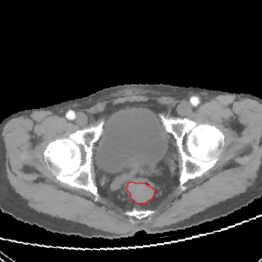

In [88]:
tmpImg

In [102]:
tmpImg.save('./sample/F.png')

In [103]:
TransImg.save('./sample/duib.png')

In [113]:
img = Image.open('./B题示例数据/CT影像/1002/arterial phase/10066_mask.png')

In [120]:
img.size

(512, 512)

In [116]:
tmp = img.resize((256,256))

In [117]:
tmp = np.asarray(tmp)

In [119]:
np.max(tmp)

0